# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from IPython.core.display import display, HTML
import scipy.stats as st

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
data = [data_0, data_1, data_2]
def head(data):
    display(data.head(5))
for col in data:
    head(col)
    print("--" * 23)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


----------------------------------------------


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


----------------------------------------------


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


----------------------------------------------


In [5]:
def info(data):
    print(data.info())
for col in data:
    print('')
    print('--' * 25)
    info(col)


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

-----------------

In [6]:
#fig, axes = plt.subplots(3, 4, figsize=(20, 15))   
#1-ый регион
#axes[0,0].boxplot(data_0['f0'])
#axes[0,0].set_title('f0')
#axes[0, 0].set_ylabel('1-ый регион')
#axes[0,1].boxplot(data_0['f1'])
#axes[0,1].set_title('f1')
#axes[0,2].boxplot(data_0['f2'])
#axes[0,2].set_title('f2')
#axes[0,3].boxplot(data_0['product'])
#axes[0,3].set_title('product')

#2-ой регион
#axes[1,0].boxplot(data_1['f0'])
#axes[1,0].set_title('f0')
#axes[1, 0].set_ylabel('2-ой регион')
#axes[1,1].boxplot(data_1['f1'])
#axes[1,1].set_title('f1')
#axes[1,2].boxplot(data_1['f2'])
#axes[1,2].set_title('f2')
#axes[1,3].boxplot(data_1['product'])
#axes[1,3].set_title('product')

#3-ий регион
#axes[2,0].boxplot(data_2['f0'])
#axes[2,0].set_title('f0')
#axes[2, 0].set_ylabel('3-ий регион')
#axes[2,1].boxplot(data_2['f1'])
#axes[2,1].set_title('f1')
#axes[2,2].boxplot(data_2['f2'])
#axes[2,2].set_title('f2')
#axes[2,3].boxplot(data_2['product'])
#axes[2,3].set_title('product')

In [7]:
def dupl(data):
    print(data.duplicated().sum())
for col in data:
    dupl(col)

0
0
0


In [8]:
def dupl_id(data):
    print(data['id'].value_counts().head(5))
for col in data:
    print('--' *10)
    dupl_id(col)

--------------------
AGS9W    2
bxg6G    2
TtcGQ    2
bsk9y    2
A5aEY    2
Name: id, dtype: int64
--------------------
wt4Uk    2
5ltQ6    2
bfPNe    2
LHZR0    2
BldTk    1
Name: id, dtype: int64
--------------------
KUPhW    2
xCHr8    2
VF7Jo    2
Vcm5J    2
LEHqV    1
Name: id, dtype: int64


In [9]:
data_0[data_0['id'] == 'bxg6G']

,id,f0,f1,f2,product
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798


С данными все впордяке.

In [10]:
def corr(data):
    display(data.corr())
for col in data:
    corr(col)
    print('--' * 21)

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


------------------------------------------


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


------------------------------------------


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


------------------------------------------


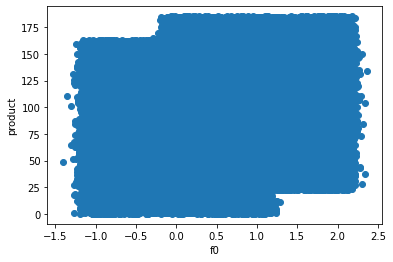

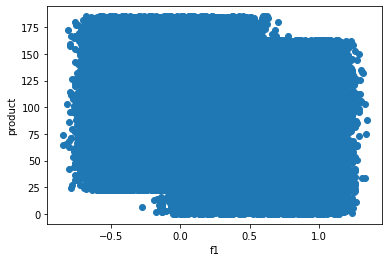

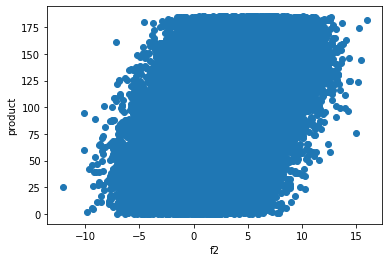

--------------------------------------------------


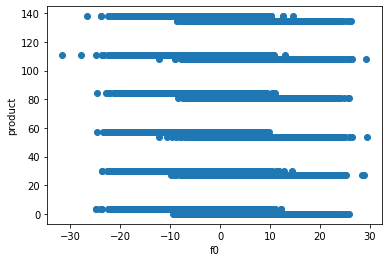

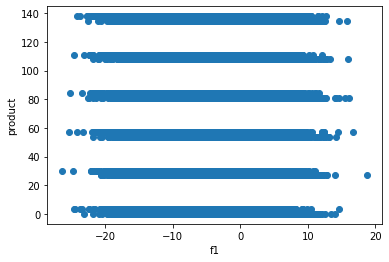

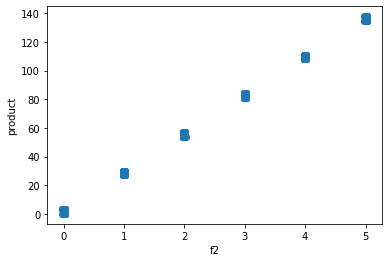

--------------------------------------------------


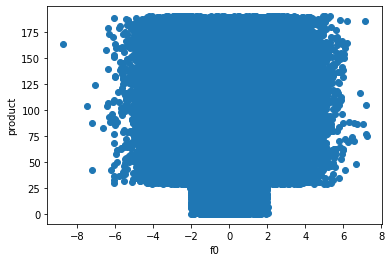

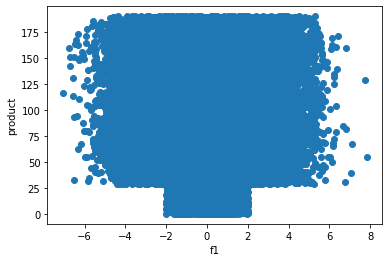

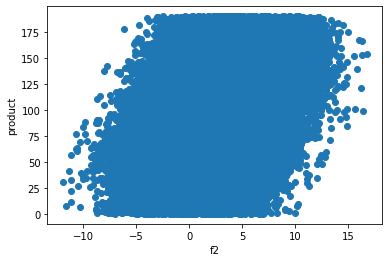

--------------------------------------------------


In [11]:
def scatter(data):
    for col in ['f0', 'f1', 'f2']:
        plt.scatter(data[col], data['product'])
        plt.xlabel(col)
        plt.ylabel('product')
        plt.show()
for x in data:
    scatter(x)
    print('--' * 25)

## Обучение и проверка модели

### Модель для 1-ого региона

In [12]:
features = data_0.drop(['id', 'product'], axis=1)
target = data_0['product']

#scaler = StandardScaler()
#scaler.fit(features)
#features = scaler.transform(features)

state = RandomState(12345)
features_train, features_valid, target_train, target_valid0 = train_test_split(
    features, target, test_size=0.25, random_state=state)

In [13]:
model = LinearRegression()
model.fit(features_train, target_train)
pred0 = model.predict(features_valid)
rmse = mean_squared_error(target_valid0, pred0)**0.5
print(f'Для 1-ого региона RMSE равно: {rmse}, а средний запас предсказанного сырья равен: {pred0.mean()}')

Для 1-ого региона RMSE равно: 37.5794217150813, а средний запас предсказанного сырья равен: 92.59256778438035


### Модель для 2-ого региона

In [14]:
features = data_1.drop(['id','product'], axis=1)
target = data_1['product']

features_train, features_valid, target_train, target_valid1 = train_test_split(
    features, target, test_size=0.25, random_state=state)

In [15]:
model = LinearRegression()
model.fit(features_train, target_train)
pred1 = model.predict(features_valid)
rmse = mean_squared_error(target_valid1, pred1)**0.5
print(f'Для 2-ого региона RMSE равно: {rmse}, а средний запас предсказанного сырья равен: {pred1.mean()}')

Для 2-ого региона RMSE равно: 0.889736773768065, а средний запас предсказанного сырья равен: 68.76995145799754


### Модель для 3-eго региона

In [16]:
features = data_2.drop(['id', 'product'], axis=1)
target = data_2['product']

features_train, features_valid, target_train, target_valid2 = train_test_split(
    features, target, test_size=0.25, random_state=state)

In [17]:
model = LinearRegression()
model.fit(features_train, target_train)
pred2 = model.predict(features_valid)
rmse = mean_squared_error(target_valid2, pred2)**0.5
print(f'Для 3-его региона RMSE равно: {rmse}, а средний запас предсказанного сырья равен: {pred2.mean()}')

Для 3-его региона RMSE равно: 39.958042459521614, а средний запас предсказанного сырья равен: 95.087528122523


Вывод: самая маленькая ошибка у 1-ого региона, по среднему запасу сырья он на 2-ом месте. Самый большой средний запас предсказанного сырья у 3-его региона, и ошибка у него 2-ая по рамзеру. У 2-ого региона самый маленький предсказанный средний запас, и по величине средней ошибки он он самый большой.

## Подготовка к расчёту прибыли

In [18]:
EXPLORE_POINTS = 500
MAX_POINTS = 200
BUDGET = 10**10
INCOME = 450000
PROB_RISK = 0.025
BREAK_EVEN_POINT = (BUDGET / INCOME) / MAX_POINTS
print(f'Объем добычи для безубыточности равен: {round(BREAK_EVEN_POINT, 2)}')

Объем добычи для безубыточности равен: 111.11


Вывод: точка безубыточности больше, чем средние занчения в регионах, поэтому нам нужна модель, которая с высокой точностью будет предсказывать объемы скважин.

## Расчёт прибыли и рисков 

In [19]:
pred0 = pd.Series(pred0, index=target_valid0.index)
pred1 = pd.Series(pred1, index=target_valid1.index)
pred2 = pd.Series(pred2, index=target_valid2.index)

In [20]:
def income_func(pred, target):
    probs_sort = pred.sort_values(ascending=False)
    selected = target[probs_sort.index][:MAX_POINTS]
    sum_true = selected.sum()
    return round((sum_true*INCOME) - BUDGET, 2)
print(f'В 1-ом регионе прибыль с 200 лучших скважин равна: {income_func(pred0, target_valid0)}')
print(f'Во 2-ом регионе прибыль с 200 лучших скважин равна: {income_func(pred1, target_valid1)}')
print(f'В 3-ом регионе прибыль с 200 лучших скважин равна: {income_func(pred2, target_valid2)}')

В 1-ом регионе прибыль с 200 лучших скважин равна: 3320826043.14
Во 2-ом регионе прибыль с 200 лучших скважин равна: 2415086696.68
В 3-ом регионе прибыль с 200 лучших скважин равна: 2539915945.84


In [21]:
def confidence_interval(pred, target):
    samples = []
    for i in range(1000):
        target_sample = target.sample(n = EXPLORE_POINTS, replace=True, random_state=state)
        pred_sample = pred[target_sample.index]
        samples.append(income_func(pred_sample, target_sample))
    samples = pd.Series(samples)
    print(f'Среднаяя прибыль равна: {samples.mean()}')
    print(f'Риск равен: {round(st.percentileofscore(samples, 0), 2)}%')
    
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    return round(lower,2), round(upper,2)

In [22]:
print("95% доверительный итервал для первого региона лежит между:",
      confidence_interval(pred0, target_valid0))
print('--' * 50)
print("95% доверительный итервал для для второго региона лежит между:",
      confidence_interval(pred1, target_valid1))
print('--' * 50)
print("95% доверительный итервал для третьего региона лежит между:",
      confidence_interval(pred2, target_valid2))

Среднаяя прибыль равна: 423897237.91688
Риск равен: 4.8%
95% доверительный итервал для первого региона лежит между: (-76187813.89, 957846531.96)
----------------------------------------------------------------------------------------------------
Среднаяя прибыль равна: 513256698.91735
Риск равен: 0.6%
95% доверительный итервал для для второго региона лежит между: (108066895.23, 928574439.24)
----------------------------------------------------------------------------------------------------
Среднаяя прибыль равна: 381120359.5758101
Риск равен: 7.4%
95% доверительный итервал для третьего региона лежит между: (-142800630.09, 893380565.75)


*Общий вывод: Максимальную прибыль принесут скважины во 2-ом регионе, плюс там самый минимальный риск. Во 3-ем регионе не рекомендуется добывать нефть, так как наибольший риск и наименьшая прибыль. В 1-ом регионе тоже можно добывать, однако там выше риск и меньше прибыль, чем во 2-ом.*